# EDA - Loan Data 

### Imports

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()

### Reading each CSV in a separate dataframe

In [4]:
#directory = os.path.dirname(os.getcwd()) 
newpathloanFinal = '/Users/madhu/Desktop/ADS Project/Dataset/Loan'
d1 = pd.read_csv(newpathloanFinal+'/LoanStats3a_securev1.csv', header=1, skipfooter=4, engine='python')
d2 = pd.read_csv(newpathloanFinal+'/LoanStats3b_securev1.csv', header=1, skipfooter=4, engine='python')
d3 = pd.read_csv(newpathloanFinal+'/LoanStats3c_securev1.csv', header=1, skipfooter=4, engine='python')
d4 = pd.read_csv(newpathloanFinal+'/LoanStats3d_securev1.csv', header=1, skipfooter=4, engine='python')
d5 = pd.read_csv(newpathloanFinal+'/LoanStats_securev1_2016Q1.csv', header=1, skipfooter=4, engine='python')
d6 = pd.read_csv(newpathloanFinal+'/LoanStats_securev1_2016Q2.csv', header=1, skipfooter=4, engine='python')
d7 = pd.read_csv(newpathloanFinal+'/LoanStats_securev1_2016Q3.csv', header=1, skipfooter=4, engine='python')
d8 = pd.read_csv(newpathloanFinal+'/LoanStats_securev1_2016Q4.csv', header=1, skipfooter=4, engine='python')
d9 = pd.read_csv(newpathloanFinal+'/LoanStats_securev1_2017Q1.csv', header=1, skipfooter=4, engine='python')
d10 = pd.read_csv(newpathloanFinal+'/LoanStats_securev1_2017Q2.csv', header=1, skipfooter=4, engine='python')
d11 = pd.read_csv(newpathloanFinal+'/LoanStats_securev1_2017Q3.csv', header=1, skipfooter=4, engine='python')

### Concatenating all the CSVs in one dataframe

In [5]:
loan_data = pd.concat([d1, d2, d3, d4, d5, d6, d7, d8, d9, d10,d11])

In [6]:
loan_data.shape

(1646773, 151)

### Finding the missing data percentage and storing columns in features with mores than 70% data

In [7]:
missing_data = loan_data.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/loan_data.shape[0])*100
missing_data.head()
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent <30)]
len(features)

93

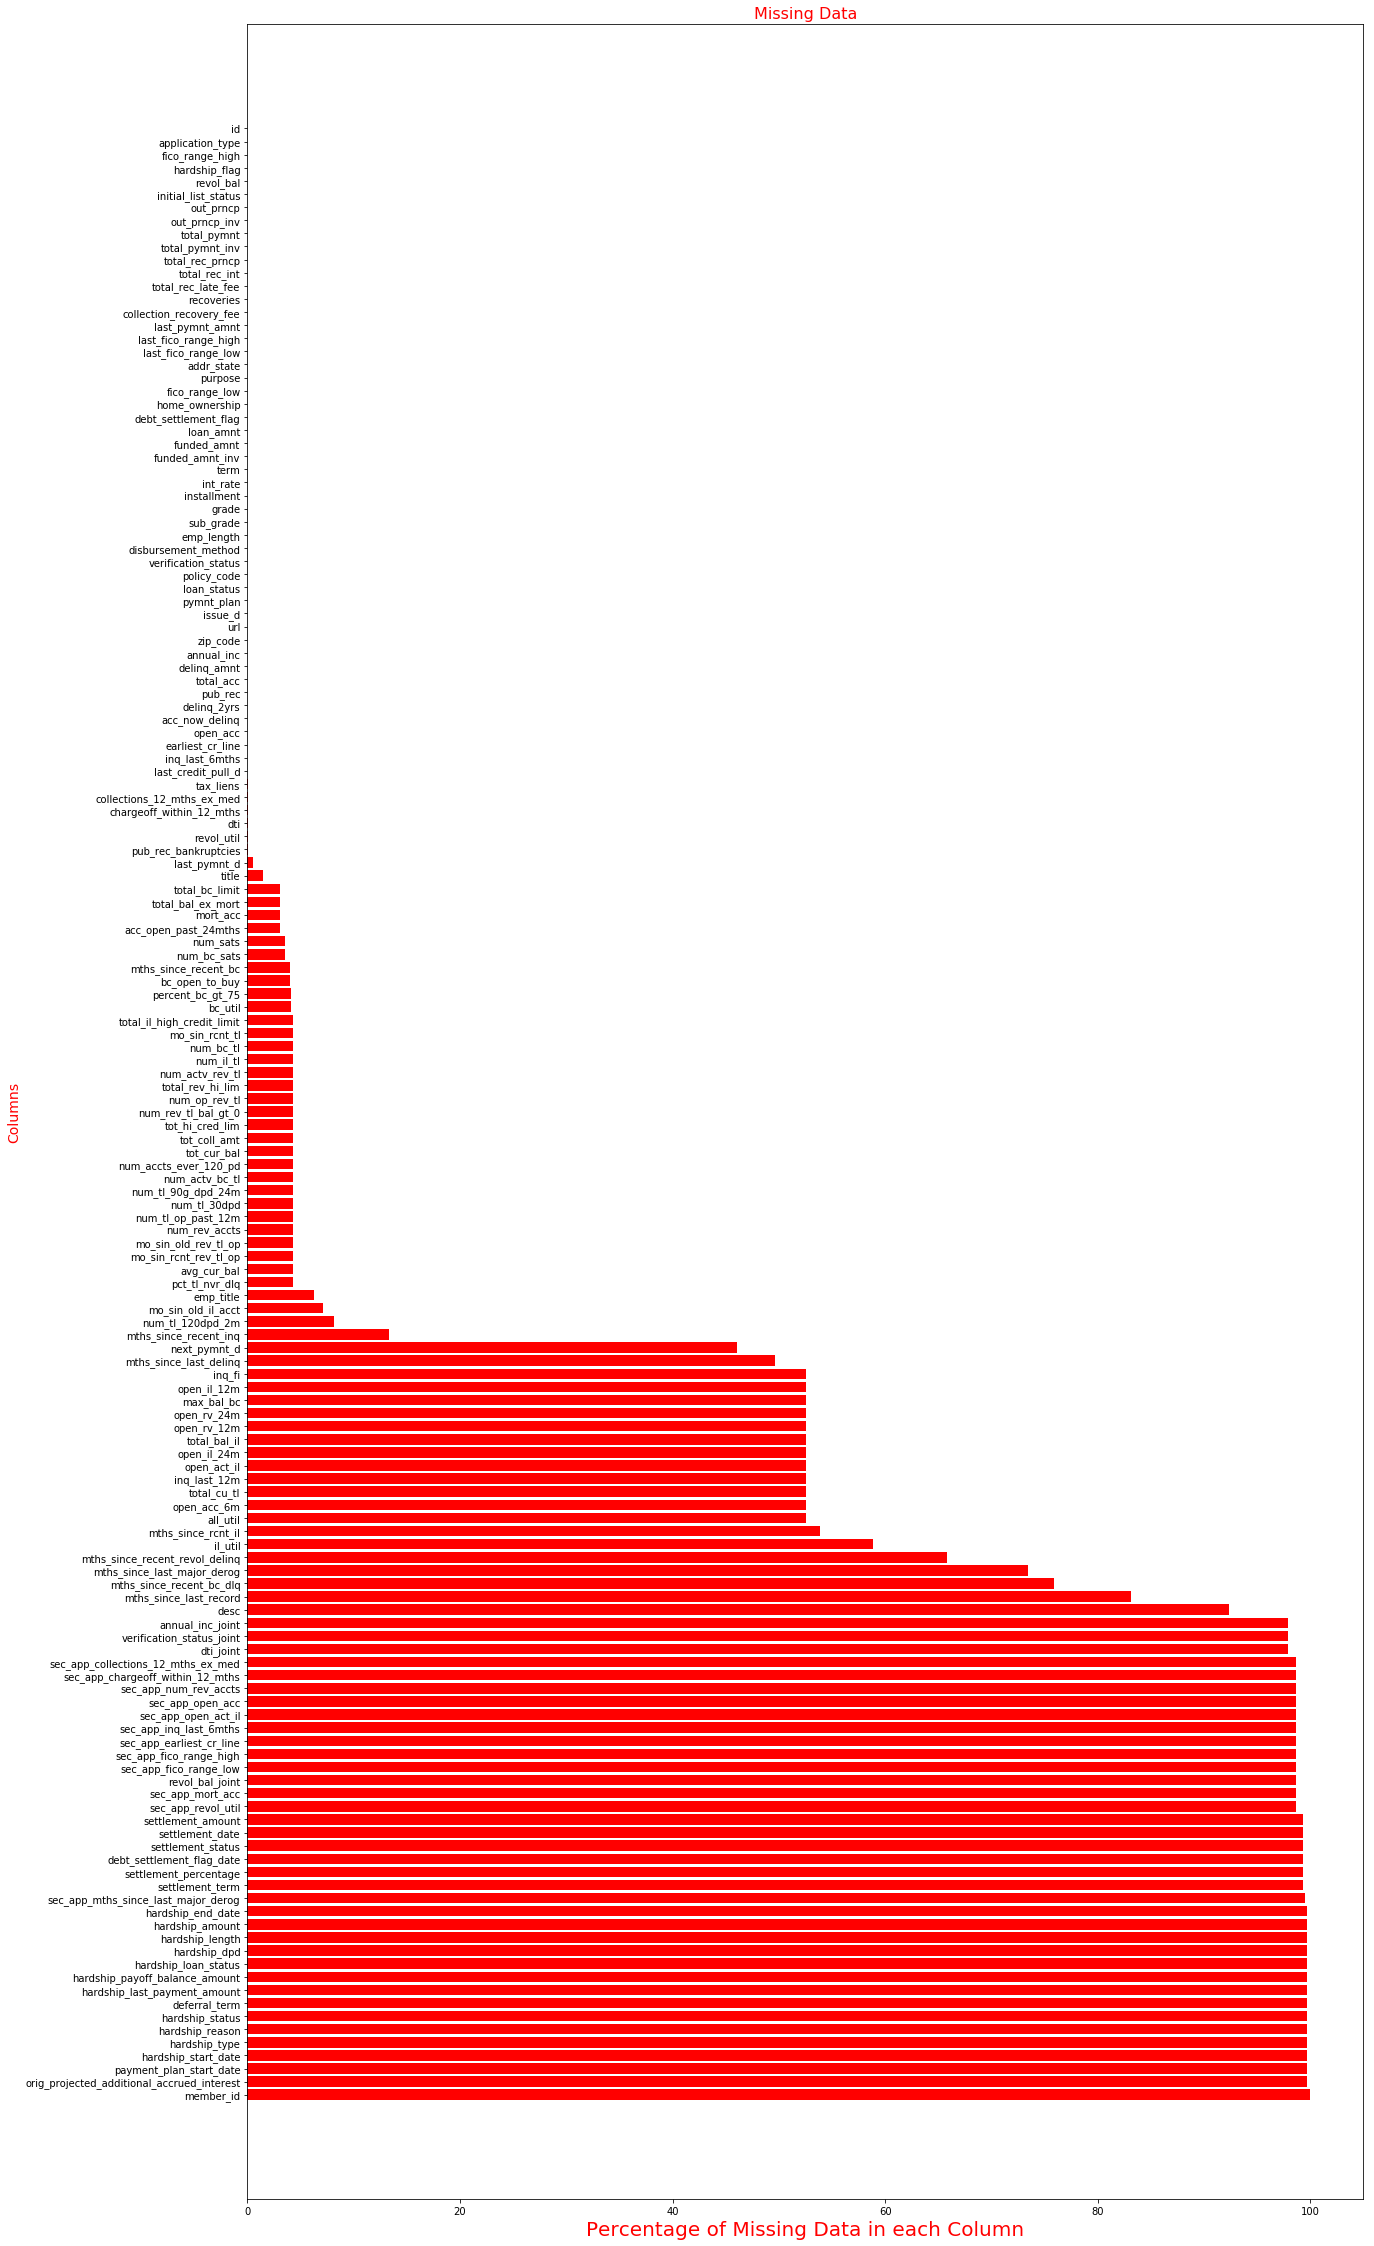

In [8]:
fig, ax = plt.subplots(figsize=(20,40))
ax.barh(range(loan_data.shape[1]), missing_data.Missing_percent.values, align='center',color='Red')

ax.set_yticks(range(loan_data.shape[1]))
ax.set_yticklabels(missing_data['index'].values,rotation =0,linespacing =20, fontsize =10)
ax.invert_yaxis()  

ax.set_xlabel('Percentage of Missing Data in each Column',fontsize=20, color='red')
ax.set_ylabel('Columns',fontsize=14, color='red')
ax.set_title('Missing Data',fontsize=16, color='red')

plt.show()

In [9]:
#del loan_data['id']
s = loan_data.reset_index()
s['index'] = s.index +1
s=s.rename(columns = {'index':'Id'})

In [10]:
f = ['Id','hardship_reason','application_type','fico_range_low','fico_range_high','emp_length','dti','annual_inc','dti_joint','annual_inc_joint','grade','sub_grade','int_rate','loan_amnt','issue_d','purpose','addr_state','zip_code']
df = s[f]
#df['Year'] = df['issue_d'].astype(str).map(lambda x: int(x.split('-')[1]))
df['Month'] = df['issue_d'].astype(str).map(lambda x: x.split('-')[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Interest Rate

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


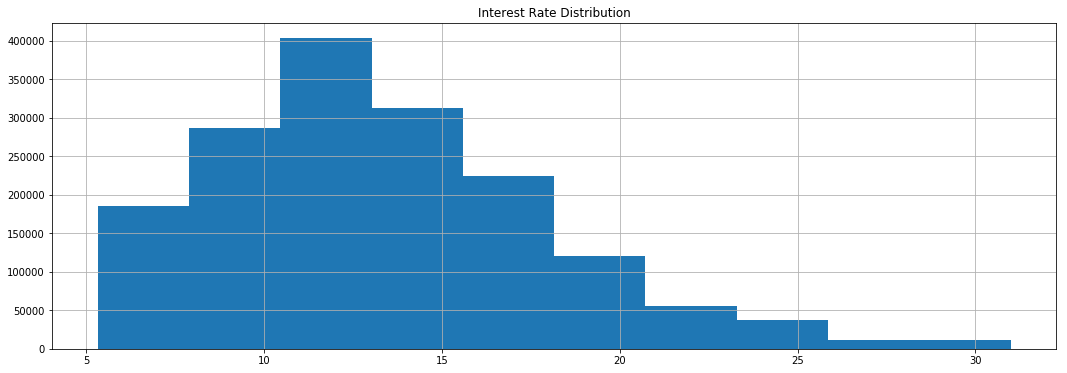

In [11]:
df['int_rate'] = df['int_rate'].astype(str).map(lambda x: x.rstrip('%'))
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')

plt.rc("figure", figsize=(18, 6))
df["int_rate"].hist()
plt.title("Interest Rate Distribution")
plt.show()

## Loan Amount distribution over the grade and subgrade

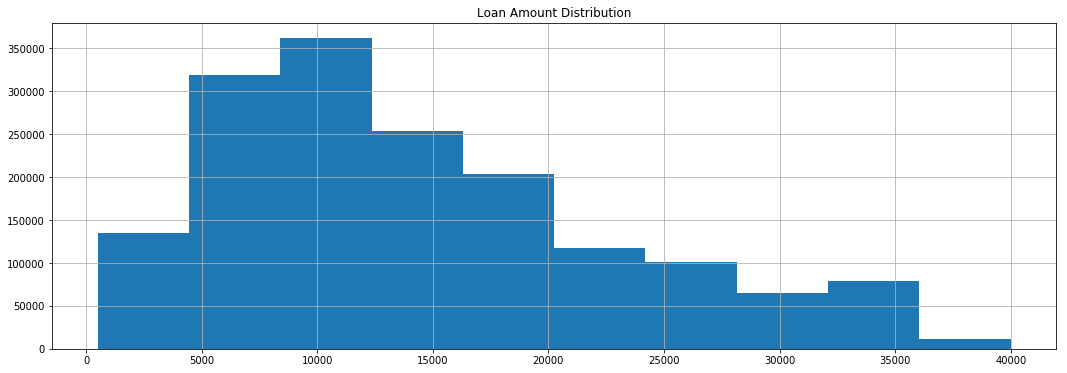

In [12]:
plt.rc("figure", figsize=(18, 6))
loan_data["loan_amnt"].hist()
plt.title("Loan Amount Distribution")
plt.show()

In [13]:
loan_data[['grade','loan_amnt']].groupby('grade').mean()

,loan_amnt
grade,
A,14030.661585
B,13515.775848
C,14708.894359
D,15665.895187
E,17841.710879
F,19096.324610
G,20340.413568


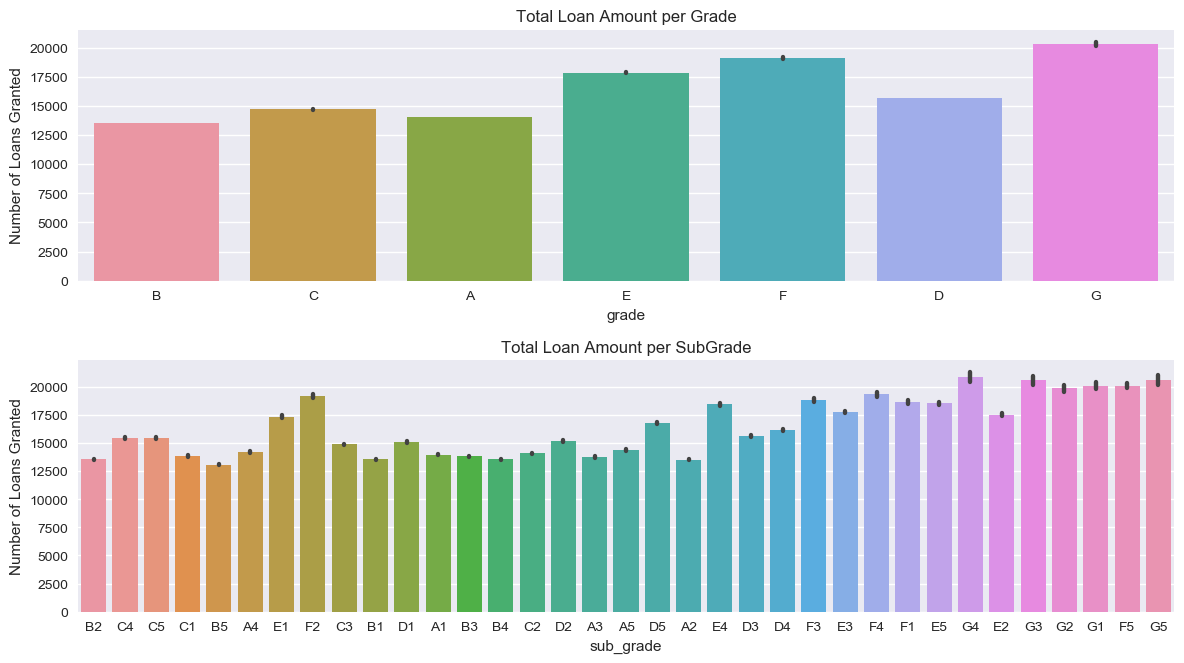

In [14]:
fig  = plt.figure(figsize=(12, 13), dpi=100);
sns.set(font_scale = 1)
axes1 = fig.add_subplot(411) 
axes2 = fig.add_subplot(412) 

ax1 = sns.barplot(x='grade', y='loan_amnt', data=loan_data,ax=axes1);
ax1.set(ylabel = 'Number of Loans Granted', title = 'Total Loan Amount per Grade')

ax2 = sns.barplot(x='sub_grade', y='loan_amnt', data=loan_data,ax=axes2);
ax2.set(ylabel = 'Number of Loans Granted', title = 'Total Loan Amount per SubGrade')

fig.tight_layout()
plt.show()

## Loan Amount per State

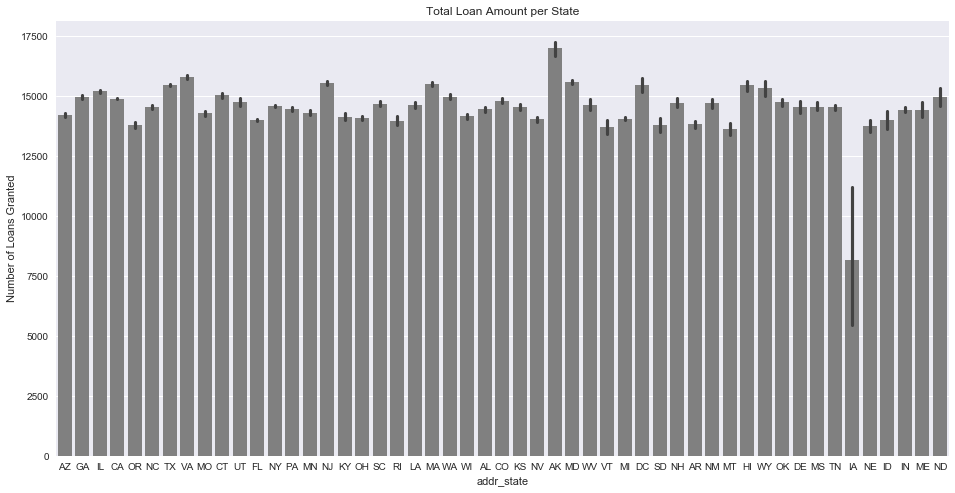

In [15]:
fig, ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x='addr_state', y='loan_amnt', data=loan_data,color='Grey')
ax.set(ylabel = 'Number of Loans Granted', title = 'Total Loan Amount per State')
plt.show()

## Fico Range

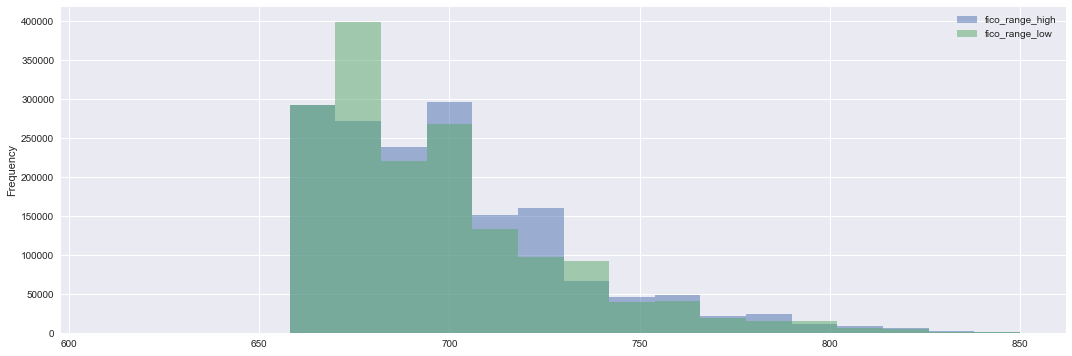

In [16]:
fico_columns = ['fico_range_high','fico_range_low']
loan_data[fico_columns].plot.hist(alpha=0.5,bins=20);
plt.show()

## Loan Status

In [18]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', None,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Current',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period',
       'Default', 'Issued'], dtype=object)

In [19]:
loan_data.groupby('loan_status').size()

loan_status
Charged Off                                            154373
Current                                                838770
Default                                                   225
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             603665
In Grace Period                                         14984
Issued                                                    540
Late (16-30 days)                                        6684
Late (31-120 days)                                      24782
dtype: int64

In [22]:
loan_data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,154373.0,15370.616461,8591.103823,900.0,9000.00,14000.0,20000.0,40000.0
Current,838770.0,15072.552786,9052.740485,1000.0,8000.00,13000.0,20000.0,40000.0
Default,225.0,15277.444444,8782.097990,1200.0,9000.00,13200.0,21000.0,35000.0
Does not meet the credit policy. Status:Charged Off,761.0,9527.233903,6404.598723,500.0,5000.00,7750.0,12000.0,25000.0
Does not meet the credit policy. Status:Fully Paid,1988.0,8853.231891,6163.442950,500.0,4000.00,7200.0,12000.0,25000.0
Fully Paid,603665.0,14018.302991,8429.798636,500.0,7500.00,12000.0,20000.0,40000.0
In Grace Period,14984.0,16290.333022,9076.109432,1000.0,9600.00,15000.0,22000.0,40000.0
Issued,540.0,16046.574074,9627.147127,1000.0,9000.00,14000.0,20850.0,40000.0
Late (16-30 days),6684.0,16358.568971,9202.716023,1000.0,9600.00,15000.0,22500.0,40000.0


In [21]:
loan_data['loan_status']

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4          Fully Paid
5          Fully Paid
6          Fully Paid
7          Fully Paid
8         Charged Off
9         Charged Off
10         Fully Paid
11         Fully Paid
12        Charged Off
13         Fully Paid
14        Charged Off
15         Fully Paid
16         Fully Paid
17         Fully Paid
18         Fully Paid
19         Fully Paid
20         Fully Paid
21        Charged Off
22         Fully Paid
23         Fully Paid
24        Charged Off
25         Fully Paid
26        Charged Off
27        Charged Off
28         Fully Paid
29         Fully Paid
             ...     
122671        Current
122672        Current
122673        Current
122674        Current
122675        Current
122676        Current
122677        Current
122678        Current
122679        Current
122680        Current
122681        Current
122682     Fully Paid
122683        Current
122684        Current
122685    

## DTI and DTI_Joint

In [26]:
# dticol = df[['dti','dti_joint','fico_range_high']].groupby('fico_range_high')
# dticol.plot.hist(alpha=0.5,bins=20);
# plt.show()

## Loan Purpose

In [28]:
loan_data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', None], dtype=object)

In [109]:
loan_data.groupby('purpose')['loan_amnt'].describe().to_frame().T

purpose        car                                                             \
             count         mean          std     min     25%     50%      75%   
loan_amnt  17641.0  9047.923871  6446.390998  1000.0  4800.0  7000.0  12000.0   

purpose            credit_card                 ...    vacation           \
               max       count          mean   ...         75%      max   
loan_amnt  40000.0    363960.0  15218.358611   ...      8000.0  40000.0   

purpose   wedding                                                              \
            count          mean          std     min     25%     50%      75%   
loan_amnt  2350.0  10479.095745  6754.309992  1000.0  5500.0  9000.0  14000.0   

purpose             
               max  
loan_amnt  35000.0  

[1 rows x 112 columns]

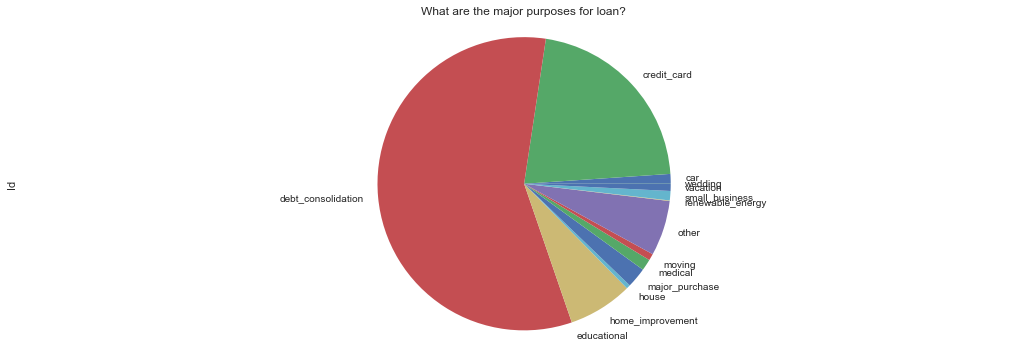

In [29]:
df.Id.groupby(df.purpose).sum().plot(kind='pie')
plt.axis('equal')
plt.title('What are the major purposes for loan?')
plt.show()

## Term

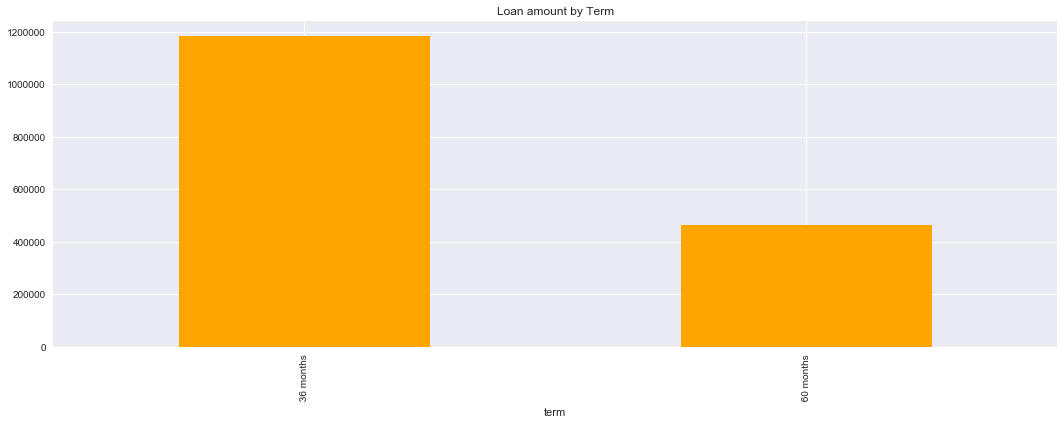

term
 36 months    1182403
 60 months     464369
Name: term, dtype: int64


In [30]:
term = loan_data.groupby('term')
term['term'].count().plot(kind='bar', color ='orange')
plt.title('Loan amount by Term')
plt.show()
print(term['term'].count())

## Application Type

In [32]:
loan_data.application_type.unique()

array(['Individual', None, 'Joint App'], dtype=object)

application_type
Individual    1612258
Joint App       34514
Name: application_type, dtype: int64


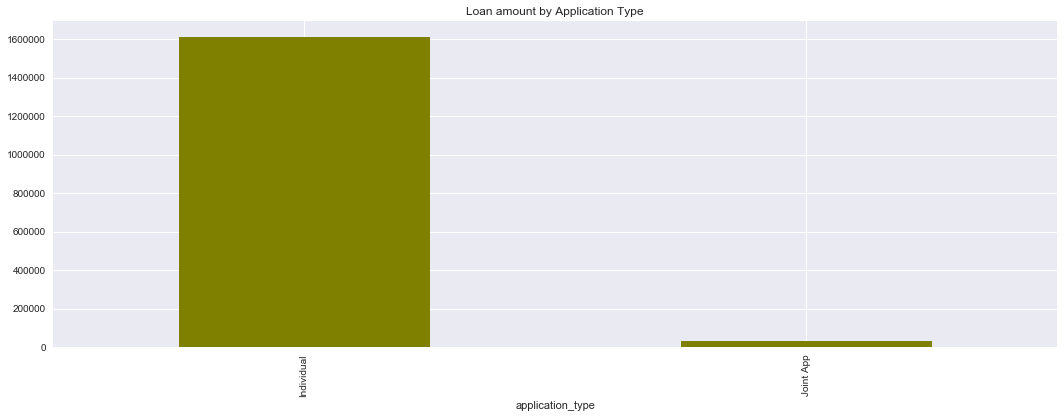

In [33]:
app = loan_data.groupby('application_type')
app['application_type'].count().plot(kind='bar', color ='olive')
plt.title('Loan amount by Application Type')
print(app['application_type'].count())
plt.show()

## Hardship

In [34]:
loan_data.groupby('hardship_reason')['loan_amnt'].count()

hardship_reason
DISABILITY                 58
DIVORCE                    88
EXCESSIVE_OBLIGATIONS     613
FAMILY_DEATH               68
INCOME_CURTAILMENT        370
MEDICAL                   389
NATURAL_DISASTER         2603
REDUCED_HOURS             212
UNEMPLOYMENT              583
Name: loan_amnt, dtype: int64

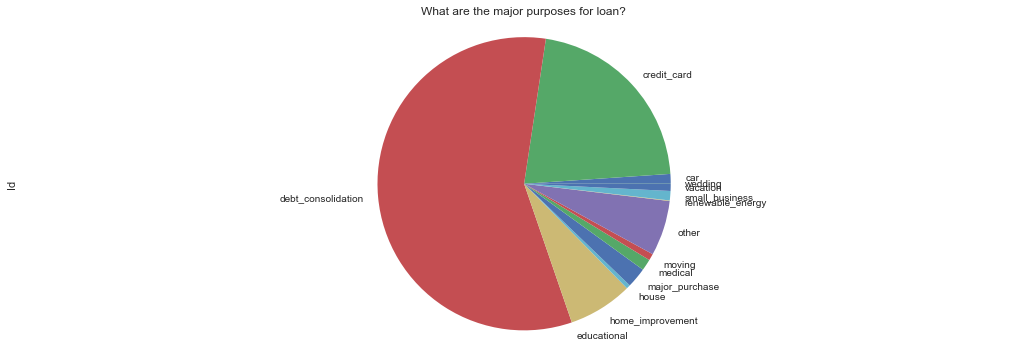

In [35]:
df.Id.groupby(df.purpose).sum().plot(kind='pie')
plt.axis('equal')
plt.title('What are the major purposes for loan?')
plt.show()

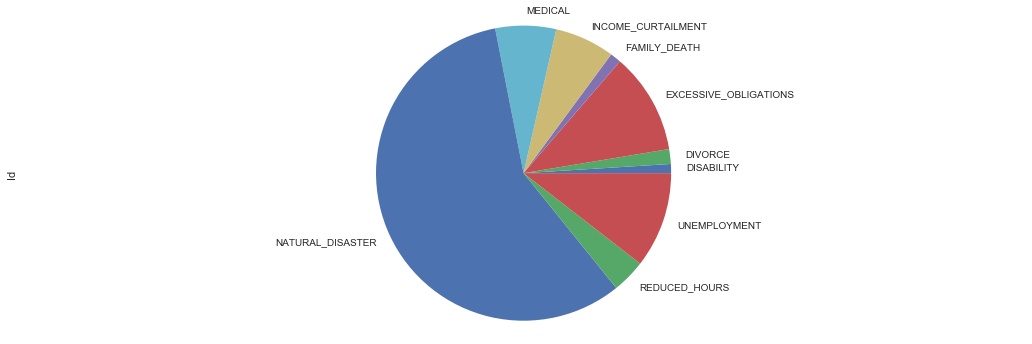

In [36]:
df.Id.groupby(df.hardship_reason).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

## Employment Length

In [37]:
df['emp_length']=np.where(df['emp_length']=='10+ years','10',df['emp_length'])
df['emp_length']=np.where(df['emp_length']=='< 1 year','0',df['emp_length'])
df['emp_length']=np.where(df['emp_length']=='1 year','1',df['emp_length'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

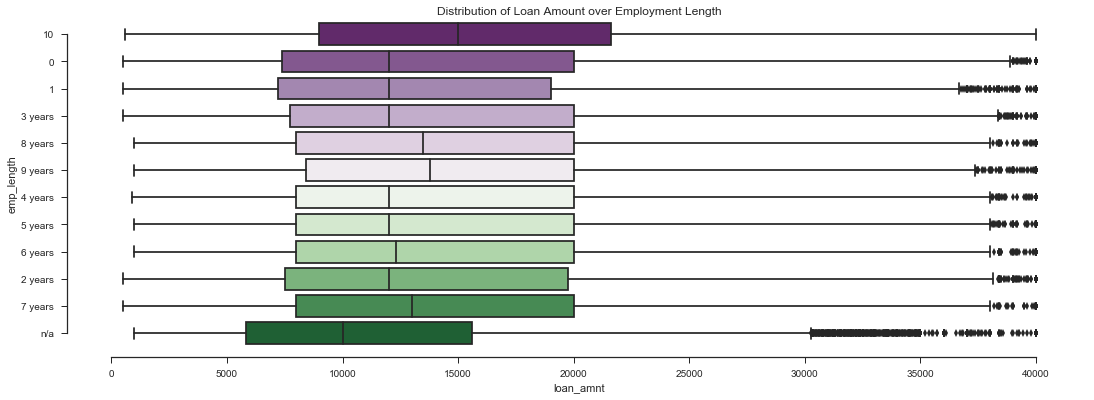

In [38]:
import seaborn as sns
sns.set(style="ticks")
plt.title('Distribution of Loan Amount over Employment Length')
sns.boxplot(x="loan_amnt", y="emp_length", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.show()

## Heat Map of columns details provided during application for Loan

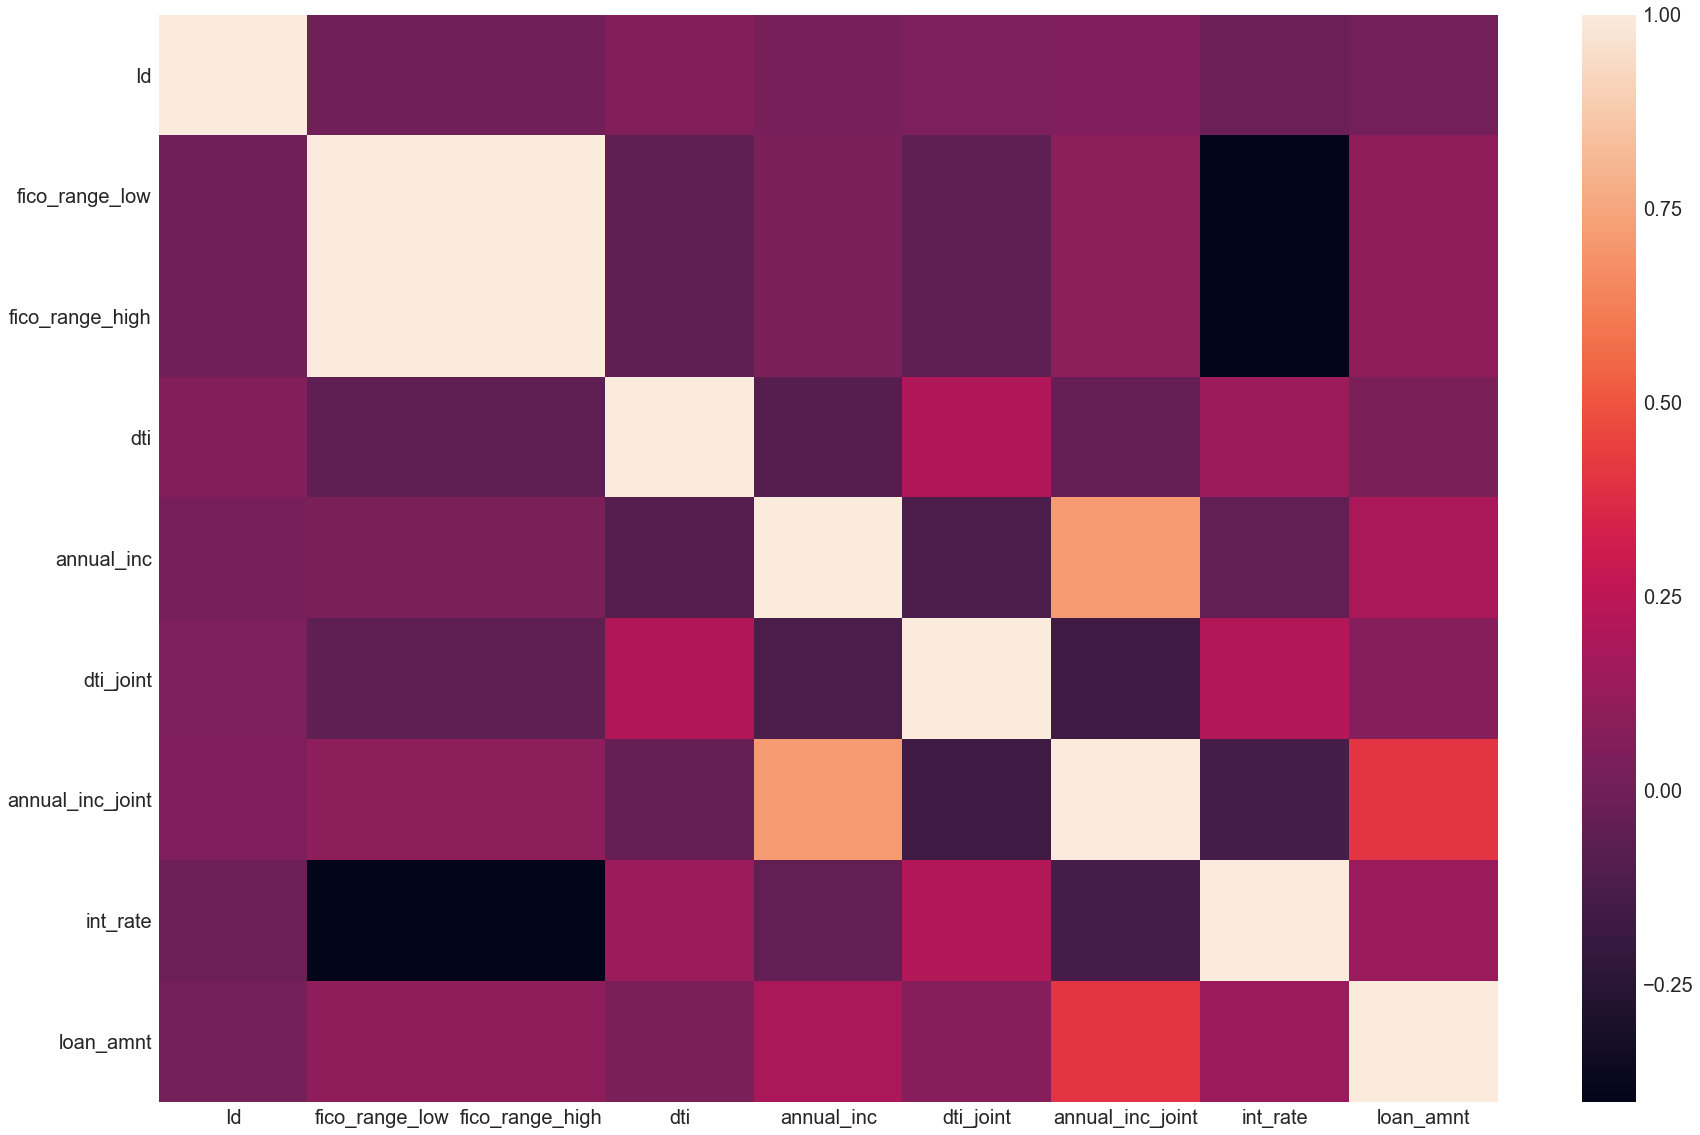

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

The text in the document by SHREYANTH REDDY BEZAWADA is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

Copyright 2018 SHREYANTH REDDY BEZAWADA AND ADITYA MOHAN KUMAR

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.